Título: TCC Análise de sentimento Kpop
Nome: Mayta Soares Custodio
Matrícula: 192.671.147
Turma: 2019.2

##Introdução

O presente notebook é parte do TCC - Trabalho de conclusão do curso BI Master (Business Intelligence Master) – Sistemas Inteligentes de Apoio à Decisão em Negócios na instituição Pontifícia Universidade Católica do Rio de Janeiro - PUC-Rio.

##Objetivo:

Realizar um estudo de análise de sentimento sobre o ritmo musical K-pop em tweets publicados na plataforma 'Twitter', a fim de entender quais as polaridades de sentimentos que fizeram esse ritmo ter um engajamento mundialmente notado em um curto período de tempo.


##Material

Google Colaboratory\
Git Hub

##Aplicabilidade:

Essa análise pode auxiliar no entendimento e definição de estratégias ligadas a marketing para utilizar o alto engajamento dos 'fãs' de k-pop em ações de promoção de marca, vendas de produtos associados, impulsionamento de personalidades no mundo digital, causas humanitárias e incrementação de comércio geral.  

##Orientação:

O tema surgiu durante a discilplica de Redes Neurais associoado ao momento social de alto impacto sofrido pelo domínio do ritmo K-pop amplamente divulgado nas redes sociais. Ao escutar e pesquisar sobre a música pop coreana e os diversos preconceitos e repercursões, notei o quanto os artistas de k-pop influenciam e ditam tendências, compras e comportamentos de pessoas de todas as faixas etárias, etinias e poder econônoico, com isso, quis entender quais são os sentimentos que mais se destacam dentro da rede social que concentra a maior troca de informação sobre o K-pop, o Twitter. 

##Prazo:

Prazo final de entrega: 27/10/2021

#Impacto e Influência do ritmo musical K-pop na sociedade: Um estudo de análise de sentimento através da rede social Twitter

Planejamento por etapas:

- Carregar as bibliotecas necessárias para o desenvolvimento
- Mapear o caminho do meu Google Drive para salvar e acessar informações
- Configurar a API Tweepy para obtenção dos dados a serem analisados
- Extração, visualização, análise dos dados e formatação para dataframe
- Pré-processamento do texto
- Análise de Sentimentos
- Avaliação dos resultados
- Conclusão Final

##Instalando as bibliotecas necessárias

In [1]:
# Instala biblioteca
!pip install tweepy
import os
import tweepy as tw
import pandas as pd

##Mapear o drive para acessar a mask do wordcloud e salvar o database csv com os tweets

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
workdir_path = '/content/drive/My Drive/TCC'  
os.chdir(workdir_path)

Mounted at /content/drive


##Confirgurar a API do Tweepy

In [3]:
# Twitter API
consumer_key = 'L6ZFeBv3SBEm8KQGemeF8F6Sr'
consumer_secret = 'XZ8S3Rw64ejZMB6ngO0YfFVqBbQ2RuNcywuwBmyatkghTXcPSR'
token = '1397925572714536976-GUiHHGEnhnalIaqKQgHHPdah0TjjYa'
token_secret = 'yqF7EmsZXvWtrKKgkjD2SaGeTjQxYGqy8ADSv1s2gsCoU'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(token, token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Define o intervalo de tempo para busca de tweets

In [7]:
# Define o intervalo de tempo para busca de tweets
from datetime import date, timedelta

delta = timedelta(days=10)        # Intervalo para busca = 10 dias
start_date = date.today()         # Começando de hoje
search_term = "kpop"              # Termo pesquisado 'kpop'
limit = 400                       # Limite de 400 tweets


##Inicializa dataframe vazio para salvar todos os tweets

In [4]:
col_names =  ["date", "tweet", "username", "retweet", "nlikes", "nreplies", "nretweets", "near"]
tweets_dataframe  = pd.DataFrame(columns = col_names)

In [5]:
tweets_dataframe

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near


##Configurar intervalo de busca de tweets

In [8]:
# define intervalo de datas   
date_string = start_date.strftime("%Y-%m-%d")

# buscar tweets no intervalo definido
tweets = tw.Cursor(api.search, q=search_term, lang="en", since=start_date).items(limit)
tweets_info = [[tweet.created_at, tweet.text, tweet.user.screen_name, tweet.retweeted, tweet.favorite_count, tweet.in_reply_to_status_id, tweet.retweet_count, tweet.user.location] for tweet in tweets]

# Extrai um dataframe
df = pd.DataFrame(data=tweets_info, columns=col_names)

## Visualizar informações do dataframe

In [9]:
df.head(10)

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2021-09-17 19:03:30,RT @nabiindaeyo: So is this official?? Is GOT7...,scbjw,False,0,NaN,557,seolar ☀️ jacky 👑
1,2021-09-17 19:03:30,RT @ANGUSRAZE: @lucyj_ford @ClashMagazine For ...,127homety,False,0,NaN,23,
2,2021-09-17 19:03:29,RT @BLACKPINKGLOBAL: Most Streamed Kpop Female...,Youaremyfate_,False,0,NaN,63,In my room
3,2021-09-17 19:03:28,RT @STAYCNews: SBS Kpop has also changed their...,notsatzushipper,False,0,NaN,12,
4,2021-09-17 19:03:27,RT @Kchartsofflcial: TOP 5 Biggest weekly stre...,saar134340,False,0,NaN,1440,
5,2021-09-17 19:03:26,RT @kuyawat: SEALED ALBUM GA ~ 48HRS! 😱\n\n- r...,Rianicholai,False,0,NaN,1760,Mars
6,2021-09-17 19:03:25,RT @kpopggontop: Most Streamed Kpop Female Son...,Ayeeeeeeee1598,False,0,NaN,521,
7,2021-09-17 19:03:24,RT @Kpop_PollVote: MOST FAMOUS KPOP SINGER AUG...,ktvcatz,False,0,NaN,1397,ⵌ mina: you are a garden in which only good th...
8,2021-09-17 19:03:24,RT @sansdejavu: Omg fellow Beliebers I just ca...,minm4rs,False,0,NaN,491,deja fucking vu
9,2021-09-17 19:03:24,RT @kpopggontop: Most Streamed Kpop Female Son...,Prames44339944,False,0,NaN,521,


## Conferindo a importação do número de tweets solicitado

In [10]:
df.tail()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
395,2021-09-17 18:57:41,I have no clue why but I’ve been in the mood t...,jimintrovert_,False,1,NaN,0,California
396,2021-09-17 18:57:40,RT @nabiindaeyo: So is this official?? Is GOT7...,ChanMW,False,0,NaN,557,under your bed
397,2021-09-17 18:57:39,RT @Kpop_PollVote: MOST FAMOUS KPOP SINGER AUG...,cutiesexyjim,False,0,NaN,1397,1013|isfp|19
398,2021-09-17 18:57:39,RT @kpopggontop: Most Streamed Kpop Female Son...,S_pinksS,False,0,NaN,521,
399,2021-09-17 18:57:38,irl agreeing on my person: ines is really a go...,gukiemoon,False,0,NaN,0,isfj-t • s/h


## Verificando se há alguma informação com tweets nulos ou missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       400 non-null    datetime64[ns]
 1   tweet      400 non-null    object        
 2   username   400 non-null    object        
 3   retweet    400 non-null    bool          
 4   nlikes     400 non-null    int64         
 5   nreplies   45 non-null     float64       
 6   nretweets  400 non-null    int64         
 7   near       400 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 22.4+ KB


In [12]:
# shape da base de dados
df.shape

(400, 8)

##Salvamos o dataframe em um arquivo csv

In [14]:
df.to_csv('tweetskpop.csv', sep=';', index=False)

##Visualização do csv do database

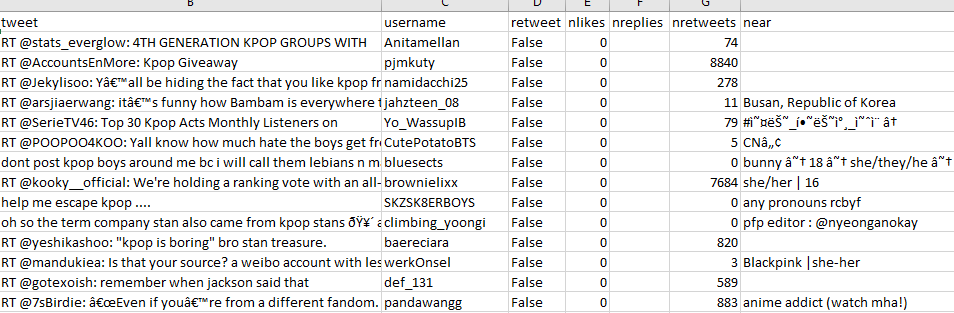

##Contagem de palavras por tweet

In [15]:
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))
df.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count
0,2021-09-17 19:03:30,RT @nabiindaeyo: So is this official?? Is GOT7...,scbjw,False,0,NaN,557,seolar ☀️ jacky 👑,27
1,2021-09-17 19:03:30,RT @ANGUSRAZE: @lucyj_ford @ClashMagazine For ...,127homety,False,0,NaN,23,,22
2,2021-09-17 19:03:29,RT @BLACKPINKGLOBAL: Most Streamed Kpop Female...,Youaremyfate_,False,0,NaN,63,In my room,26
3,2021-09-17 19:03:28,RT @STAYCNews: SBS Kpop has also changed their...,notsatzushipper,False,0,NaN,12,,11
4,2021-09-17 19:03:27,RT @Kchartsofflcial: TOP 5 Biggest weekly stre...,saar134340,False,0,NaN,1440,,22


## Platar um histograma para verificar a distribuição da quantidade de palavras nos tweets

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


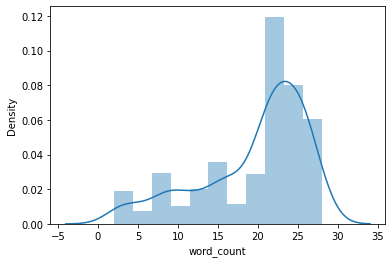

In [20]:
import seaborn as sns
sns.distplot(df.word_count, hist=True);

##Contagem de tweets com mais de 10 palavras ( considerado um tweet mais completo e consistente)

In [21]:
df2 = df[df.word_count > 10]
df2.shape

(343, 9)

## A base foi carregada e ajustada

## Iniciar o pré-processamento do texto

##Instalando as bibliotecas necessárias

In [22]:
import nltk
import spacy
!python -m spacy download en_core_web_md
!python -m spacy link en_core_web_md en --force
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
!pip install contractions
from contractions import contractions_dict
import unicodedata

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=32639d5920ff60784f14fc1763b5a58ddb5ef70f37d97fc8ea6bb4f3867eb13e
  Stored in directory: /tmp/pip-ephem-wheel-cache-out37a3i/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_md -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 321 kB 5.1 MB/s 
     |████████████████████████████████| 284 kB 58.6 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=bc64eb93bef6f824266b975e97195cd40c70636cf507098445f901047ef64bdc
  Stored in directory: /root/.cache/pip/whee

In [23]:
from spacy.lang.pt.examples import sentences 

In [24]:
!python -m spacy download pt_core_news_sm


     |████████████████████████████████| 21.2 MB 1.2 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186282 sha256=47f0b1d7b7a8a6b1946f717886e858f68b2afad104f5ca438567c292cb50bb10
  Stored in directory: /tmp/pip-ephem-wheel-cache-u33phceq/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


##Carrega tokenizador e lista de stopwords

##Após primeiros testes, foram adicionadas (append) mais palavras às stopwords para melhorar a precisão da análise dos dados

In [25]:
nlp = spacy.load('en')

tokenizer = ToktokTokenizer()
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('not')
stopword_list.remove('no')
stopword_list.append('k-pop')
stopword_list.append('kpop')
stopword_list.append('rt')
stopword_list.append('pic.twitter.com')
stopword_list.append('pic')
stopword_list.append('twitter')
stopword_list.append('follow')
stopword_list.append('follower')
stopword_list.append('look')
stopword_list.append('go')
stopword_list.append('one')
stopword_list.append('first')
stopword_list.append('da')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Ver as 20 primeiras stopwords (serão removidas)

In [26]:
stopword_list[0:20] 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

##Tratamento: Remoção de stopwords, lemetização, stemming, caracteres especiais, acentos e links

In [27]:
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

'''Lematização
'''
def lemmatize(text):
  text = nlp(text)
  text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
  return text

'''Stemming'''
def stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

'''Remove caracteres especiais'''
def remove_special_characters(text, remove_digits=False):
  special_char_pattern = re.compile(r'([{.(-)!}])')
  text = special_char_pattern.sub(" \\1 ", text)

  pattern = r'[^a-zA-z0-9\s]'
  text = re.sub(pattern, '', text)
  return text

'''

'''
def expand_contractions(text, contraction_mapping=contractions_dict):
  contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

  def expand_match(contraction):
      match = contraction.group(0)
      first_char = match[0]
      expanded_contraction = contraction_mapping.get(match) \
          if contraction_mapping.get(match) \
          else contraction_mapping.get(match.lower())
      expanded_contraction = first_char + expanded_contraction[1:]
      return expanded_contraction
  
  
  try:
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
  except:
    return text
  return expanded_text

'''Remove acentos'''
def remove_accent(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

'''Remove links'''
def strip_html_tags(text):
  text = re.sub(r"http[s]?://\S+", "", text)
  text = re.sub(r"\s+", " ", text)
  soup = BeautifulSoup(text, "html.parser")
  stripped_text = soup.get_text()
  return stripped_text

## Criar funções para limpar texto

In [28]:
def clean(corpus):

  normalized_corpus = []
  for doc in corpus:
    # remove links
    doc = strip_html_tags(doc)

    # remove acentuação
    doc = remove_accent(doc)

    # expandir contrações
    doc = expand_contractions(doc)
    # doc = list(cont.expand_texts(doc, precise=True))

    # coloca tudo em caixa baixa
    doc = doc.lower()

    # remove linhas em branco
    doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)

    # lemmatização
    doc = lemmatize(doc)

    # remove caracteres especiais 
    doc = remove_special_characters(doc)

    # remove linhas em branco
    doc = re.sub(' +', ' ', doc)

    # remove stopwords
    doc = remove_stopwords(doc)

    # insere na lista o texto após limpeza
    normalized_corpus.append(doc)

  
  return normalized_corpus # retorna corpus pré processado

##Testar a limpeza de dados com um texto externo ao dataframe

In [29]:
#Song: American Pie 

c = ["So, bye bye, Miss American Pie",
     "UPPER CASE",
     "Drove my Chevy to the levee, but the levee was #dry",
     "And them good ol' boys were drinkin' whiskey and rye", 
     "Singin', This'll be the day that I die" , 
     "This'll be the @day that I die"]
clean(c)

['bye bye miss american pie',
 'upper case',
 'drive chevy levee levee dry',
 'thehem good old boy drinkin whiskey rye',
 'singin thisll day die',
 'thisll day die']

##Aplicar a limpeza de dados no database

In [30]:
import time

start = time.time()
normalized_corpus = clean(df2.tweet.to_list())
normalized_corpus[0:5]

end = time.time()

##Verificando quanto tempo durou a limpeza

In [31]:
total_time = (end - start)/60 # em minutos
print("Tempo de limpeza dos dados")
print(str(total_time) + " minutos")

Tempo de limpeza dos dados
0.0844305157661438 minutos


##Substituir na base de dados de tweets

In [32]:
df2.tweet = normalized_corpus
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count
0,2021-09-17 19:03:30,nabiindaeyo official got7 group mehember group...,scbjw,False,0,NaN,557,seolar ☀️ jacky 👑,27
1,2021-09-17 19:03:30,angusraze lucyj_ford clashmagazine real though...,127homety,False,0,NaN,23,,22
2,2021-09-17 19:03:29,blackpinkglobal stream fehemale song spotify g...,Youaremyfate_,False,0,NaN,63,In my room,26
3,2021-09-17 19:03:28,staycnews sbs also change youtube header,notsatzushipper,False,0,NaN,12,,11
4,2021-09-17 19:03:27,kchartsofflcial top 5 big weekly stream solois...,saar134340,False,0,NaN,1440,,22


##Base de dados pronta

# Análise de Sentimentos

##Gerando uma wordcloud

##Importando as bibliotecas necessárias

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

##Imagem retirada do Google imagens e modificada manualmente para ser mask do cloud
##O símbolo na cultura K-pop significa 'I love you' ou 'Saranghaeyo'

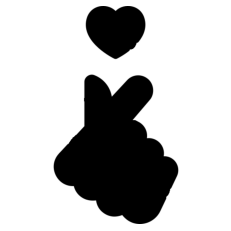

In [34]:
kpop_mask = np.array(Image.open("kpop_mask5.png"))

img=mpimg.imread('kpop_mask5.png')
imgplot = plt.imshow(img)
plt.axis("off");

## Define a mask e as características da cloud de palavras

In [35]:
wc = WordCloud(background_color="white", max_words=2000, mask=kpop_mask,
               contour_width=1, contour_color='steelblue', max_font_size=120)

## Incluindo as palavras na nuvem

In [36]:
df2_texts = ' '.join(df2.tweet) # converte lista de textos em um único texto
wc.generate(df2_texts)

##Exibe a wordcloud

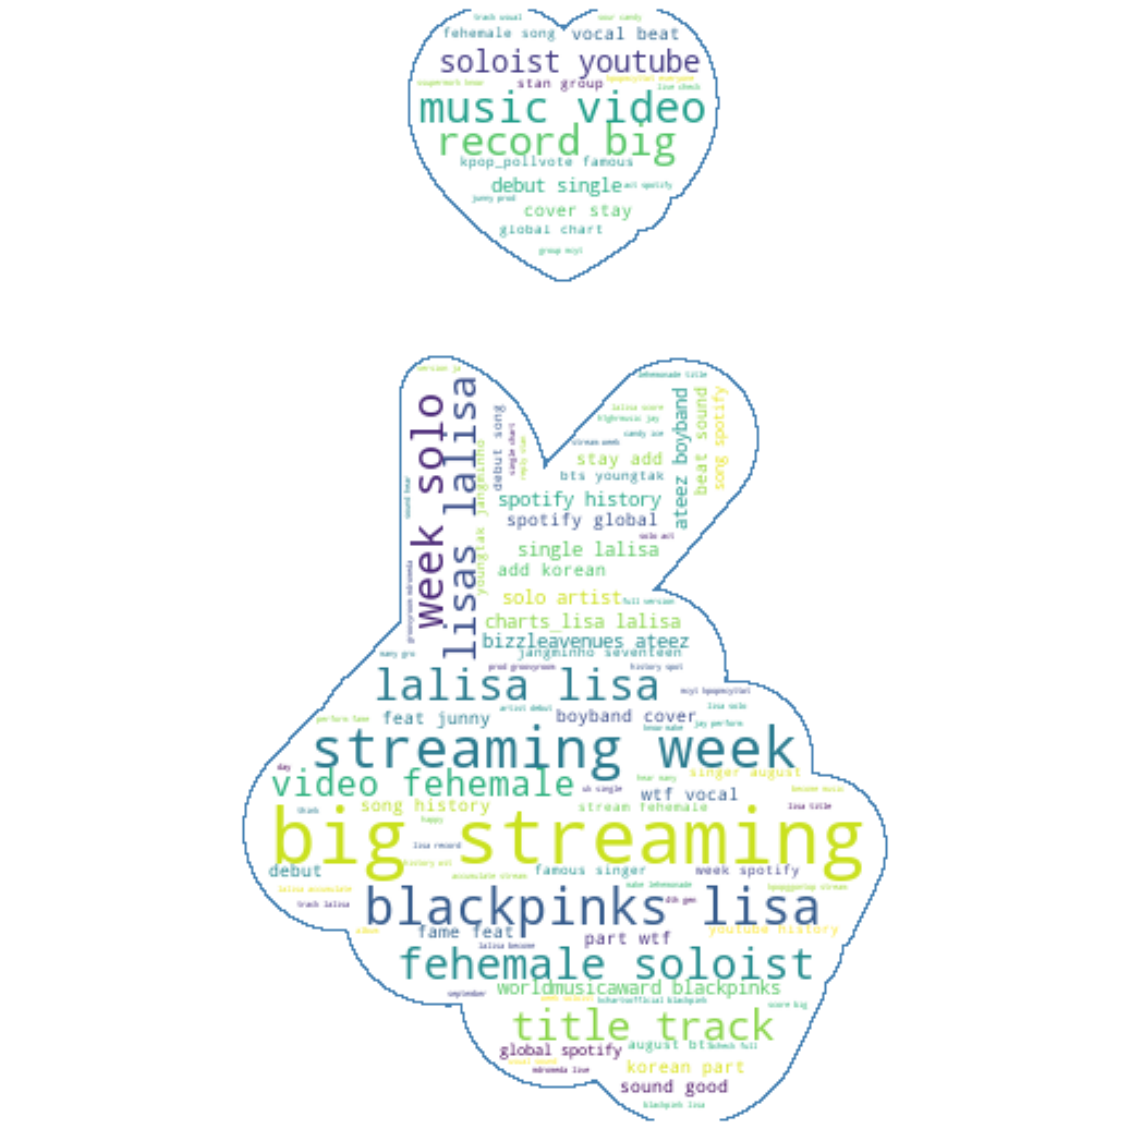

In [37]:
plt.figure(figsize = (20,40))
plt.imshow(wc, interpolation='bilinear'); 
plt.axis("off");

##Testa as bibliotecas para análises de sentimentos

##Instalando as bibliotecas necessárias

In [38]:
# Biblioteca AFINN - https://pypi.org/project/afinn/
!pip install Afinn
from afinn import Afinn

# Biblioteca NLTK - https://www.nltk.org/
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     |████████████████████████████████| 52 kB 874 kB/s 
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=71255ddf459a46c74cd23ae0e49b5184555678effc4b50f91b9cd328562a017c
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built Afinn
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


##Testamos a análise em uma frase aleatória

In [40]:
#Limpeza de frase
cleaned_text = clean(["I believe that covid IT's a terrible DISEASE!"])
print(cleaned_text)

['believe covid terrible disease']


##Teste de análise com a biblioteca AFINN

In [41]:
afinn = Afinn()
sentiment_score = afinn.score(cleaned_text[0]) 
print(sentiment_score)

-4.0


##Avaliado com sucesso como 'negativo'.

##Teste de análise com a biblioteca NLTK

In [42]:
sid = SentimentIntensityAnalyzer()
analysis_score = sid.polarity_scores(cleaned_text[0])
analysis_score

{'compound': -0.4767, 'neg': 0.508, 'neu': 0.492, 'pos': 0.0}

##Avaliado com sucesso como 'negativo'.

##Resultado composto que mede quantitativamente a negatividade e positividade da sentença

In [43]:
analysis_score.get('compound') 

-0.4767

##Avaliado com sucesso como 'negativo'.

# Aplicação da análise na base de dados

##Avaliar sentimento em todos os tweets

In [44]:
sentiment_afinn = []
sentiment_afinn_class = []
sentiment_nltk = []
sentiment_nltk_class = []

for tweet in df2.tweet:
  afinn_score = afinn.score(tweet)
  sentiment_afinn.append(afinn_score)
  sentiment_afinn_class.append('positive' if afinn_score>0 else 'neutral' if afinn_score == 0 else 'negative')

  nltk_score = sid.polarity_scores(tweet).get('compound')
  sentiment_nltk.append(nltk_score)
  sentiment_nltk_class.append('positive' if nltk_score>0 else 'neutral' if nltk_score == 0 else 'negative')

##Salvando no dataframe

In [45]:
df2['SentimentAFINN'] = sentiment_afinn 
df2['SentimentAFINN_class'] = sentiment_afinn_class 
df2['SentimentNLTK'] = sentiment_nltk 
df2['SentimentNLTK_class'] = sentiment_nltk_class 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

##Exibindo dataframe com análise se sentimentos AFINN e NLTK

In [46]:
df2.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count,SentimentAFINN,SentimentAFINN_class,SentimentNLTK,SentimentNLTK_class
0,2021-09-17 19:03:30,nabiindaeyo official got7 group mehember group...,scbjw,False,0,NaN,557,seolar ☀️ jacky 👑,27,0.0,neutral,0.0000,neutral
1,2021-09-17 19:03:30,angusraze lucyj_ford clashmagazine real though...,127homety,False,0,NaN,23,,22,0.0,neutral,0.0000,neutral
2,2021-09-17 19:03:29,blackpinkglobal stream fehemale song spotify g...,Youaremyfate_,False,0,NaN,63,In my room,26,0.0,neutral,0.0000,neutral
3,2021-09-17 19:03:28,staycnews sbs also change youtube header,notsatzushipper,False,0,NaN,12,,11,0.0,neutral,0.0000,neutral
4,2021-09-17 19:03:27,kchartsofflcial top 5 big weekly stream solois...,saar134340,False,0,NaN,1440,,22,3.0,positive,0.2023,positive


# Formatação da coluna da data, retirando a hora para agrupar os dados

##Transformar a coluna date para datetime

In [47]:
df2['date'] = pd.to_datetime(df['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#Criar as colunas de dia e hora convertendo o valor da coluna date para uma string no formato de data.

In [48]:
# Coluna 'Data'
df2['day'] = df2['date'].dt.strftime('%Y-%m-%d')
# Coluna 'Hora'
df2['hour'] = df2['date'].dt.strftime('%H:%M:%S')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


##Visualizando o dataframe

In [49]:
df2.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count,SentimentAFINN,SentimentAFINN_class,SentimentNLTK,SentimentNLTK_class,day,hour
0,2021-09-17 19:03:30,nabiindaeyo official got7 group mehember group...,scbjw,False,0,NaN,557,seolar ☀️ jacky 👑,27,0.0,neutral,0.0000,neutral,2021-09-17,19:03:30
1,2021-09-17 19:03:30,angusraze lucyj_ford clashmagazine real though...,127homety,False,0,NaN,23,,22,0.0,neutral,0.0000,neutral,2021-09-17,19:03:30
2,2021-09-17 19:03:29,blackpinkglobal stream fehemale song spotify g...,Youaremyfate_,False,0,NaN,63,In my room,26,0.0,neutral,0.0000,neutral,2021-09-17,19:03:29
3,2021-09-17 19:03:28,staycnews sbs also change youtube header,notsatzushipper,False,0,NaN,12,,11,0.0,neutral,0.0000,neutral,2021-09-17,19:03:28
4,2021-09-17 19:03:27,kchartsofflcial top 5 big weekly stream solois...,saar134340,False,0,NaN,1440,,22,3.0,positive,0.2023,positive,2021-09-17,19:03:27


##Remover a coluna date e hora (date) e reordenar colocando a coluna da data no inicio

In [50]:
# Remove a coluna 'date' 
del df2['date']

# Reordenar sem a coluna  'hour'
df2 = df2[['day', 'tweet', 'username', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'near', 'word_count', 'SentimentAFINN', 'SentimentAFINN_class', 'SentimentNLTK', 'SentimentNLTK_class']]

##Visualizando o novo dataframe

In [51]:
df2.head()

,day,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count,SentimentAFINN,SentimentAFINN_class,SentimentNLTK,SentimentNLTK_class
0,2021-09-17,nabiindaeyo official got7 group mehember group...,scbjw,False,0,NaN,557,seolar ☀️ jacky 👑,27,0.0,neutral,0.0000,neutral
1,2021-09-17,angusraze lucyj_ford clashmagazine real though...,127homety,False,0,NaN,23,,22,0.0,neutral,0.0000,neutral
2,2021-09-17,blackpinkglobal stream fehemale song spotify g...,Youaremyfate_,False,0,NaN,63,In my room,26,0.0,neutral,0.0000,neutral
3,2021-09-17,staycnews sbs also change youtube header,notsatzushipper,False,0,NaN,12,,11,0.0,neutral,0.0000,neutral
4,2021-09-17,kchartsofflcial top 5 big weekly stream solois...,saar134340,False,0,NaN,1440,,22,3.0,positive,0.2023,positive


##Calcular a média dos sentimetos para a base

In [52]:
mean_sentiments = df2.groupby('day').mean()
mean_sentiments.head()

,retweet,nlikes,nreplies,nretweets,word_count,SentimentAFINN,SentimentNLTK
day,,,,,,,
2021-09-17,False,0.142857,1.438932e+18,901.740525,21.720117,0.874636,0.121793


# Trabalhando com a biblioteca AFINN

##Plotando gráficos entre os sentimentos 'negativos' na cor 'Rosa' e 'positivos', na cor 'Verde', no dataframe

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

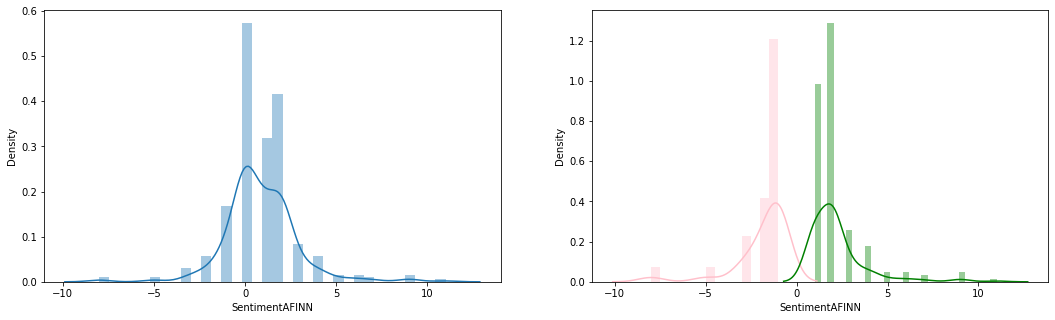

In [53]:
fig, axs = plt.subplots(ncols=2, figsize=(18,5))
sns.distplot(df2.SentimentAFINN, label = 'polarity', ax=axs[0]);

negative_tweets = df2[df2.SentimentAFINN_class == 'negative']
positive_tweets = df2[df2.SentimentAFINN_class == 'positive']
neutral_tweets = df2[df2.SentimentAFINN_class == 'neutral']
sns.distplot(negative_tweets.SentimentAFINN, color = 'pink', label = 'negative');
sns.distplot(positive_tweets.SentimentAFINN, color = 'green', label = 'positive');


#A quantidade de comentário neutros é muito volumosa, o que afeta a análise de sentimentos positivos e negativos, sendo assim, não a incluiremos no gráfico
#sns.distplot(neutral_tweets.SentimentAFINN, color = 'orange', label = 'neutral');

##Comparativo da quantidade de sentimentos positivos, negativos e neutros
##Verificamos que a quantidade de postagens positivas sobre o K-pop excede absolutamente os comentários negativos (hates) 

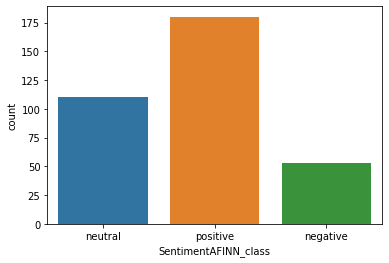

In [55]:
sns.countplot(x='SentimentAFINN_class', data=df2);

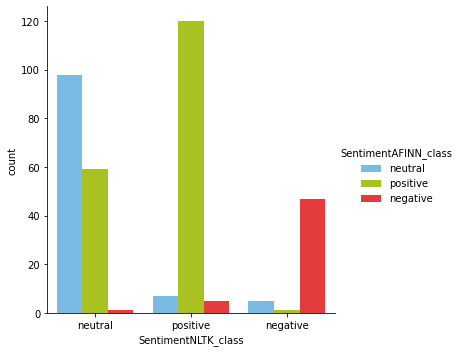

In [56]:
sns.catplot(x="SentimentNLTK_class", hue="SentimentAFINN_class", data=df2, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"});

##Curiosamente apesar de ser em maioria positivos, a quantidade de 'retweets' é muito baixa. O que significa que os internautas preferem postar sobre um assunto para que este tema suba aos 'trending topics', do que apoiar uma outra postagem que esteja passando a mesma informação.

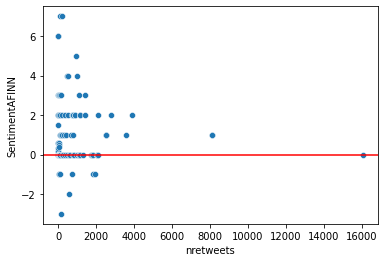

In [57]:
mean_by_nretweets = df2.groupby('nretweets').mean()
mean_by_nretweets=mean_by_nretweets[0:234] # retirar os últimos 3 que são muito extremos

# fig, axs = plt.subplots())
sns.scatterplot(x=mean_by_nretweets.index, y="SentimentAFINN", data=mean_by_nretweets)
plt.axhline(y=0, color='r', linestyle='-');

##Analisando a quantidade de 'likes' por tweets, vemos que é ainda mais baixa, se comparado com os 'retweets', o que reforça a ideia de que para esse público, é mais importante postar e engajar um assunto/tema, do que apoiar os demais fãs que pensam da mesma forma.

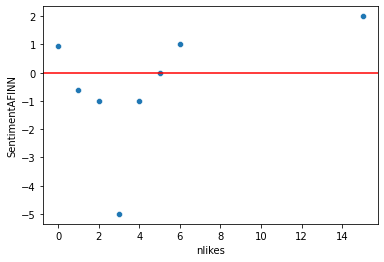

In [58]:
mean_by_nlikes = df2.groupby('nlikes').mean()
#mean_by_nlikes=mean_by_nlikes[0:234] # retirar os últimos 3 que são muito extremos
sns.scatterplot(x=mean_by_nlikes.index, y="SentimentAFINN", data=mean_by_nlikes)
plt.axhline(y=0, color='r', linestyle='-');

# Trabalhando com a biblioteca NLTK

##Plotando *gráficos* entre os sentimentos 'negativos' na cor 'Rosa' e 'positivos', na cor 'Verde', no dataframe

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

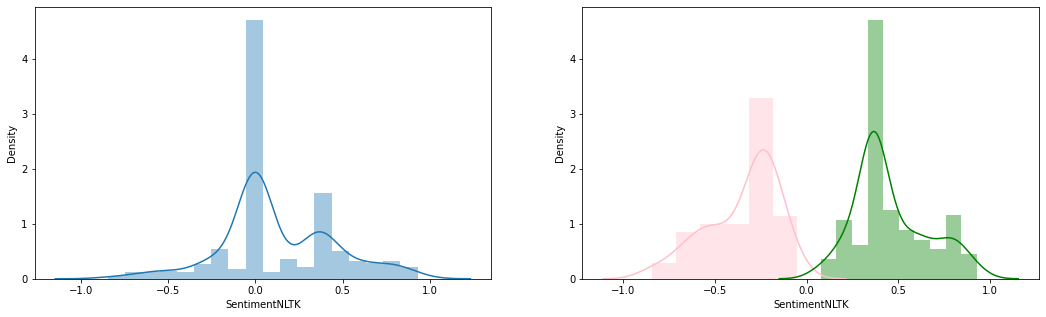

In [59]:
fig, axs = plt.subplots(ncols=2, figsize=(18,5))
sns.distplot(df2.SentimentNLTK, label = 'polarity', ax=axs[0]);

negative_tweets = df2[df2.SentimentNLTK_class == 'negative']
positive_tweets = df2[df2.SentimentNLTK_class == 'positive']
sns.distplot(negative_tweets.SentimentNLTK, color = 'pink', label = 'negative');
sns.distplot(positive_tweets.SentimentNLTK, color = 'green', label = 'positive');

##Comparativo da quantidade de sentimentos positivos, negativos e neutros
##Verificamos que a quantidade de postagens positivas sobre o K-pop excede significativamente os comentários negativos (hates) 


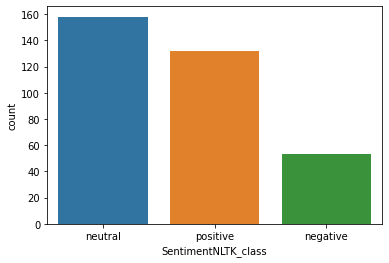

In [61]:
sns.countplot(x='SentimentNLTK_class', data=df2);

##Análise apresenta o mesmo resultado da biblioteca AFINN em relação aos positivos serem maiores que os negativos, mas apresenta uma diferença em relação aos comentários neutros.

## Análise apresenta o mesmo resultado da biblioteca AFINN sobre a quantidade de 'retweets'. 

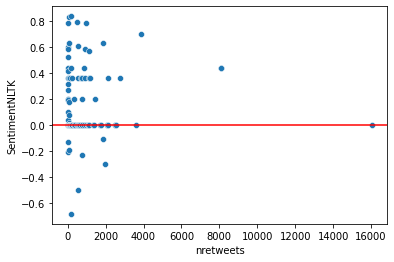

In [62]:
mean_by_nretweets = df2.groupby('nretweets').mean()
mean_by_nretweets=mean_by_nretweets[0:234] # retirar os últimos 3 que são muito extremos

# fig, axs = plt.subplots())
sns.scatterplot(x=mean_by_nretweets.index, y="SentimentNLTK", data=mean_by_nretweets)
plt.axhline(y=0, color='r', linestyle='-');

# Conclusão

Ambas bibliotecas utilizadas apresentaram análise similar, validando que no geral, a reação ao k-pop é positiva. Sendo as pessoas que comentam sobre o assunto públicos alvos fortes para ação de estratégia de marketing, incluindo nesse engajamento produtos e promoção de ramos comerciais.